In [1]:
from basicgeo import P2, P3
from wingshape import WingShape
from parapolygraph import ParamPolyGraph
import numpy, math

wingshape = WingShape("P7-211221-XYZ geometry.csv")        
print("Parametrization in uv: ", wingshape.urange, wingshape.vrange)
# approximately flat and in metres (based around section 7) without the compression at the leading edge    
#parapolygraph = ParamPolyGraph(wingshape, "segmentedwing.txt", deprecatedTrimFile=True)
#parapolygraph.saveas("test.json")
parapolygraph = ParamPolyGraph(wingshape, "test7.json", splineweight=0.8, legsampleleng=0.05)


Parametrization in uv:  (0, 6.11206792886613) (-1.377293405726668, 1.377293405726668)


<IPython.core.display.Javascript object>


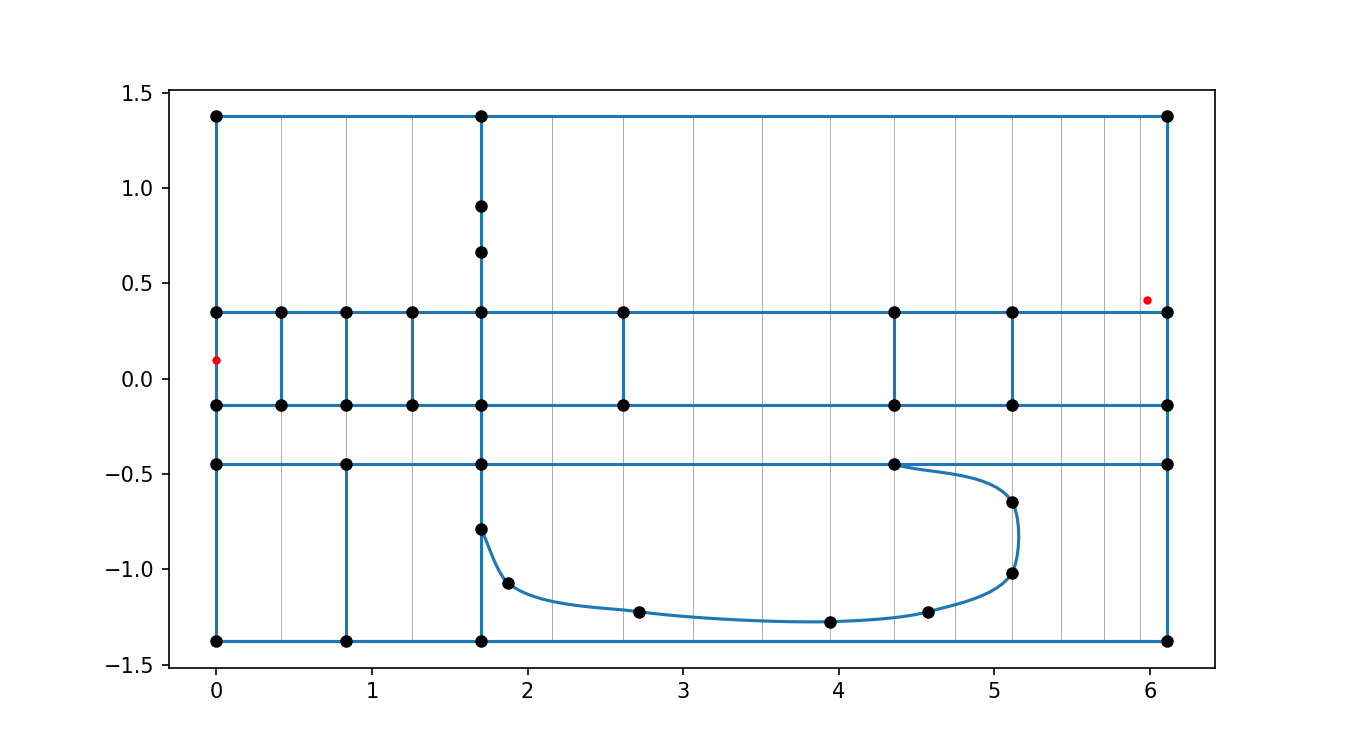

In [2]:
%matplotlib notebook

from matplotlib import pyplot as plt
import interactiveuvpara

# parapolygraph.splineweight =0.9

fig = plt.figure(figsize=(9,5))
interactiveuvpara.makeinteractivefigure(fig, parapolygraph)
plt.show()

In [3]:
parapolygraph.saveas("test.json")


In [3]:
parapolygraph.splineinterplegsdata()
polysnodes = parapolygraph.derivepolygons()
surfacemeshes = parapolygraph.surfacemesheslist(polysnodes, mesh_size=0.05)

#freecadappimage = "/home/timbo/software/FreeCAD_0.19-24054-Linux-Conda_glibc2.12-x86_64.AppImage"
# fetch from: wget https://github.com/FreeCAD/FreeCAD/releases/download/0.19_pre/FreeCAD_0.19-24267-Linux-Conda_glibc2.12-x86_64.AppImage
freecadappimage = "freecad"   # nixos install

from parapolygraph import trimeshesflattener
trimeshesflattener(surfacemeshes, freecadappimage)


/nix/store/sr711v3q725xxiybwnlfx6167s1zhqy4-python3.9-numpy-1.21.2/lib/python3.9/site-packages/numpy/ctypeslib.py:518: RuntimeWarning: A builtin ctypes object gave a PEP3118 format string that does not match its itemsize, so a best-guess will be made of the data type. Newer versions of python may behave correctly.
  return asarray(obj)


>>> >>> >>> >>> >>> >>> >>> >>> >>> ... ... ... ... ... ... ... ... >>> >>> 
>>> 

[FreeCAD Console mode <Use Ctrl-D (i.e. EOF) to exit.>]
mesh (pts=1154, tris=2170) flattened
mesh (pts=1788, tris=3282) flattened
mesh (pts=716, tris=1346) flattened
mesh (pts=5878, tris=11420) flattened
mesh (pts=598, tris=1118) flattened
mesh (pts=3300, tris=6358) flattened
mesh (pts=2002, tris=3618) flattened
mesh (pts=356, tris=654) flattened
mesh (pts=683, tris=1276) flattened
mesh (pts=2347, tris=4533) flattened
mesh (pts=212, tris=376) flattened
mesh (pts=266, tris=482) flattened
mesh (pts=628, tris=1139) flattened
mesh (pts=341, tris=628) flattened
mesh (pts=1159, tris=2208) flattened
mesh (pts=1098, tris=2090) flattened
[FreeCAD Console mode <Use Ctrl-D (i.e. EOF) to exit.>]



<IPython.core.display.Javascript object>


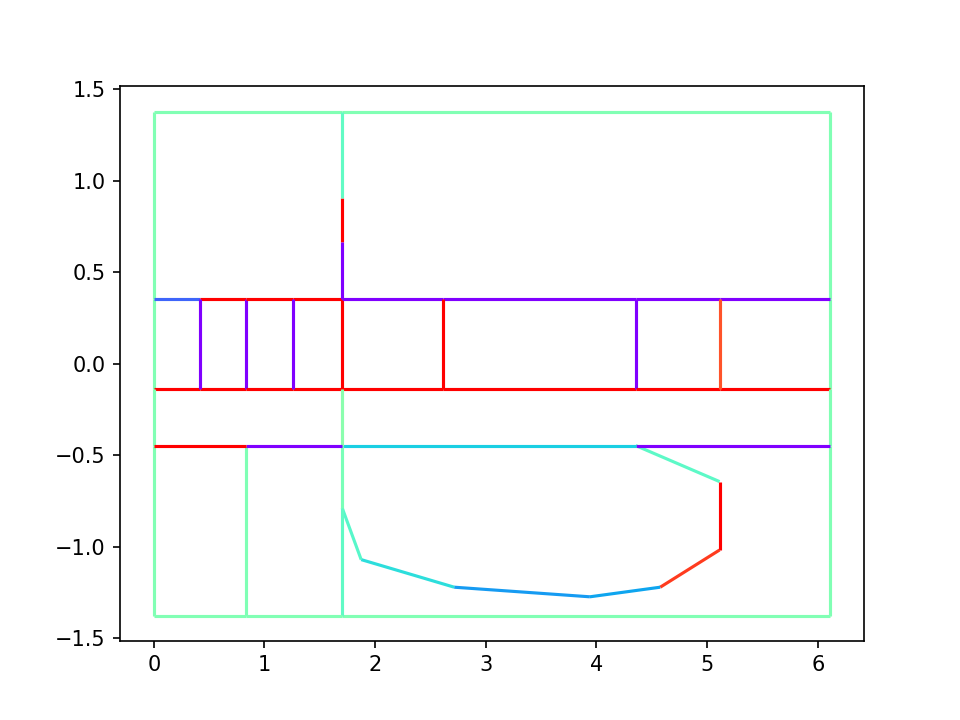

In [4]:
%matplotlib notebook

from matplotlib import pyplot as plt
from matplotlib import colors
from matplotlib.collections import LineCollection

parapolygraph.deriveflatpathstretchratios(surfacemeshes)
cmap = plt.cm.rainbow
norm = colors.Normalize(vmin=0.9999, vmax=1.0001)
plt.figure()
plt.gca().add_collection(LineCollection(parapolygraph.legsdata(), color=cmap(norm(parapolygraph.legsstretchratio()))))
plt.gca().autoscale()

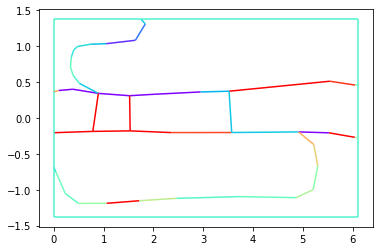

In [39]:
%matplotlib inline

from matplotlib import pyplot as plt
from matplotlib import colors
from matplotlib.collections import LineCollection

parapolygraph.deriveflatpathstretchratios(surfacemeshes)
cmap = plt.cm.rainbow
norm = colors.Normalize(vmin=0.999, vmax=1.0015)
plt.figure()
plt.gca().add_collection(LineCollection(parapolygraph.legsdata(), color=cmap(norm(parapolygraph.legsstretchratio()))))
plt.gca().autoscale()

In [4]:
print("n1 \tn2 \tflat1\tflat2\trealleng")
#for f in parapolygraph.flatpathtable:
#    print("%s\t%s %.3f\t%.3f\t%.3f" % f)


n1 	n2 	flat1	flat2	realleng


<IPython.core.display.Javascript object>


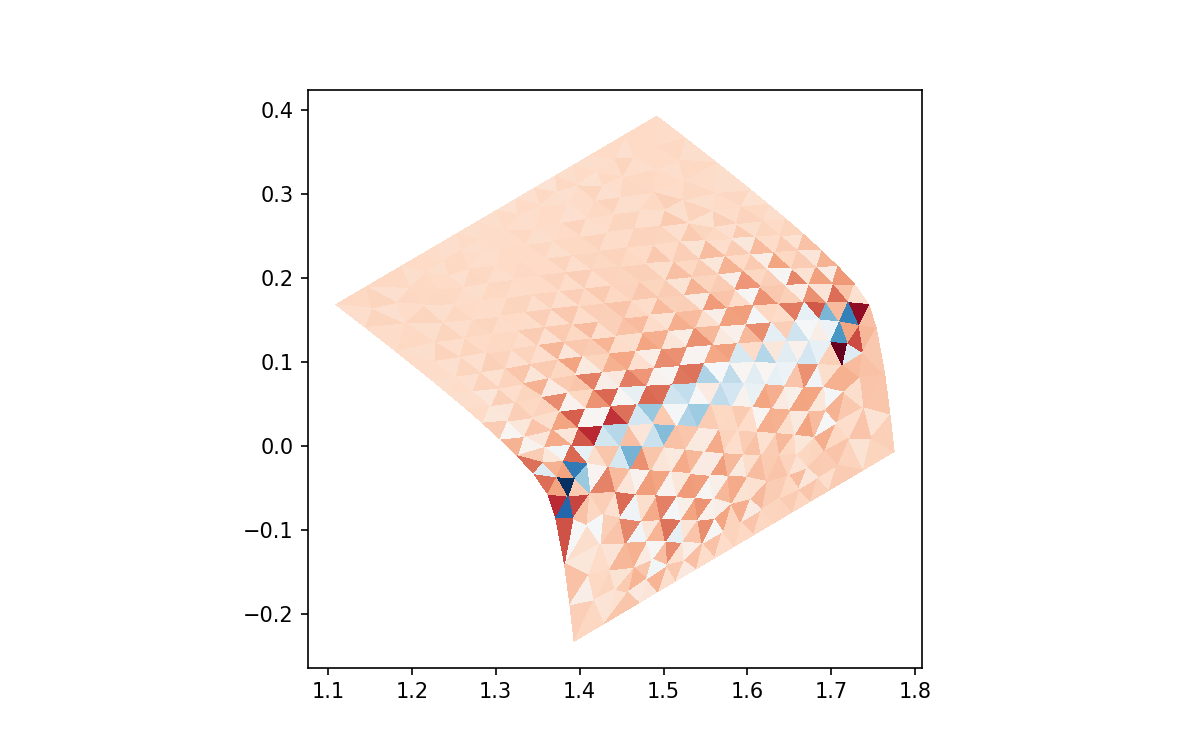

In [65]:
%matplotlib notebook 

from matplotlib import pyplot as plt

fig = plt.figure(figsize=(8,5))

sis = range(len(surfacemeshes))
sis = [7]
for i in sis:
    surfacemesh = surfacemeshes[i]
    uvpts = surfacemesh["uvpts"]
    pts = surfacemesh["pts"]
    fpts = surfacemesh["fpts"]
    tris = surfacemesh["tris"]
    tx, ty = sum(uvpts, start=P2(0,0))*(1.0/len(uvpts))
    X = fpts[:,0]+tx
    Y = fpts[:,1]+ty
    
    #plt.triplot(X, Y, tris, color=col)
    areachange = surfacemesh["triareas"]/surfacemesh["ftriareas"]
    plt.tripcolor(X, Y, tris, facecolors=areachange, cmap='RdBu')
    
plt.gca().set_aspect("equal")
#plt.colorbar()
#plt.savefig("test.png")

In [68]:
# first attempt at plotting the original triangles in the flat triangles
# however the change is too small to be noticeable.
def insettri(fpts, pts, tri, sfac):
    p0, p1, p2 = P3(*pts[tri[0]]), P3(*pts[tri[1]]), P3(*pts[tri[2]])
    v1, v2 = p1 - p0, p2 - p0
    vperp = P3.Cross(v1, v2)
    v1perp = P3.Cross(v1, vperp)
    
    fp0f, fp1f, fp2f = P2(*fpts[tri[0]]), P2(*fpts[tri[1]]), P2(*fpts[tri[2]])
    fp0, fp1, fp2 = P3.ConvertGZ(fp0f, 0.0), P3.ConvertGZ(fp1f, 0.0), P3.ConvertGZ(fp2f, 0.0)
    fv1, fv2 = fp1 - fp0, fp2 - fp0
    fvperp = P3.Cross(fv1, fv2)
    fv1perp = P3.Cross(fv1, fvperp)
    
    cp = (p0 + p1 + p2)*(1/3)
    fcp = (fp0f + fp1f + fp2f)*(1/3)

    uvec = P3.ZNorm(v1)
    vvec = P3.ZNorm(v1perp)
    fuvec = P2.ZNorm(P2.ConvertLZ(fv1))
    fvvec = P2.ZNorm(P2.ConvertLZ(fv1perp))
    
    r0 = P2(P3.Dot(uvec, p0 - cp), P3.Dot(vvec, p0 - cp))*sfac
    r1 = P2(P3.Dot(uvec, p1 - cp), P3.Dot(vvec, p1 - cp))*sfac
    r2 = P2(P3.Dot(uvec, p2 - cp), P3.Dot(vvec, p2 - cp))*sfac
    
    fr0 = fcp + fuvec*r0.u + fvvec*r0.v
    fr1 = fcp + fuvec*r1.u + fvvec*r1.v
    fr2 = fcp + fuvec*r2.u + fvvec*r2.v
    return (fr0,fr1,fr2,fr0)





In [71]:
# second at plotting the original triangles in the flat triangles
# by radial distance and trying to exaggerate the difference
def insettri(fpts, pts, tri, sfac):
    p0, p1, p2 = P3(*pts[tri[0]]), P3(*pts[tri[1]]), P3(*pts[tri[2]])
    fp0f, fp1f, fp2f = P2(*fpts[tri[0]]), P2(*fpts[tri[1]]), P2(*fpts[tri[2]])
    cp = (p0 + p1 + p2)*(1/3)
    fcp = (fp0f + fp1f + fp2f)*(1/3)

    dc0, dc1, dc2 = (p0 - cp).Len(), (p1 - cp).Len(), (p2 - cp).Len()
    fvdc0, fvdc1, fvdc2 = fp0f - fcp, fp1f - fcp, fp2f - fcp
    fdc0, fdc1, fdc2 = fvdc0.Len(), fvdc1.Len(), fvdc2.Len()
    exags = 30
    fac0 = sfac*((fdc0/dc0 - 1)*exags + 1)
    fac1 = sfac*((fdc1/dc1 - 1)*exags + 1)
    fac2 = sfac*((fdc2/dc2 - 1)*exags + 1)
    fr0 = fcp + fvdc0*fac0
    fr1 = fcp + fvdc1*fac1
    fr2 = fcp + fvdc2*fac2
    
    return (fr0,fr1,fr2,fr0)





<IPython.core.display.Javascript object>


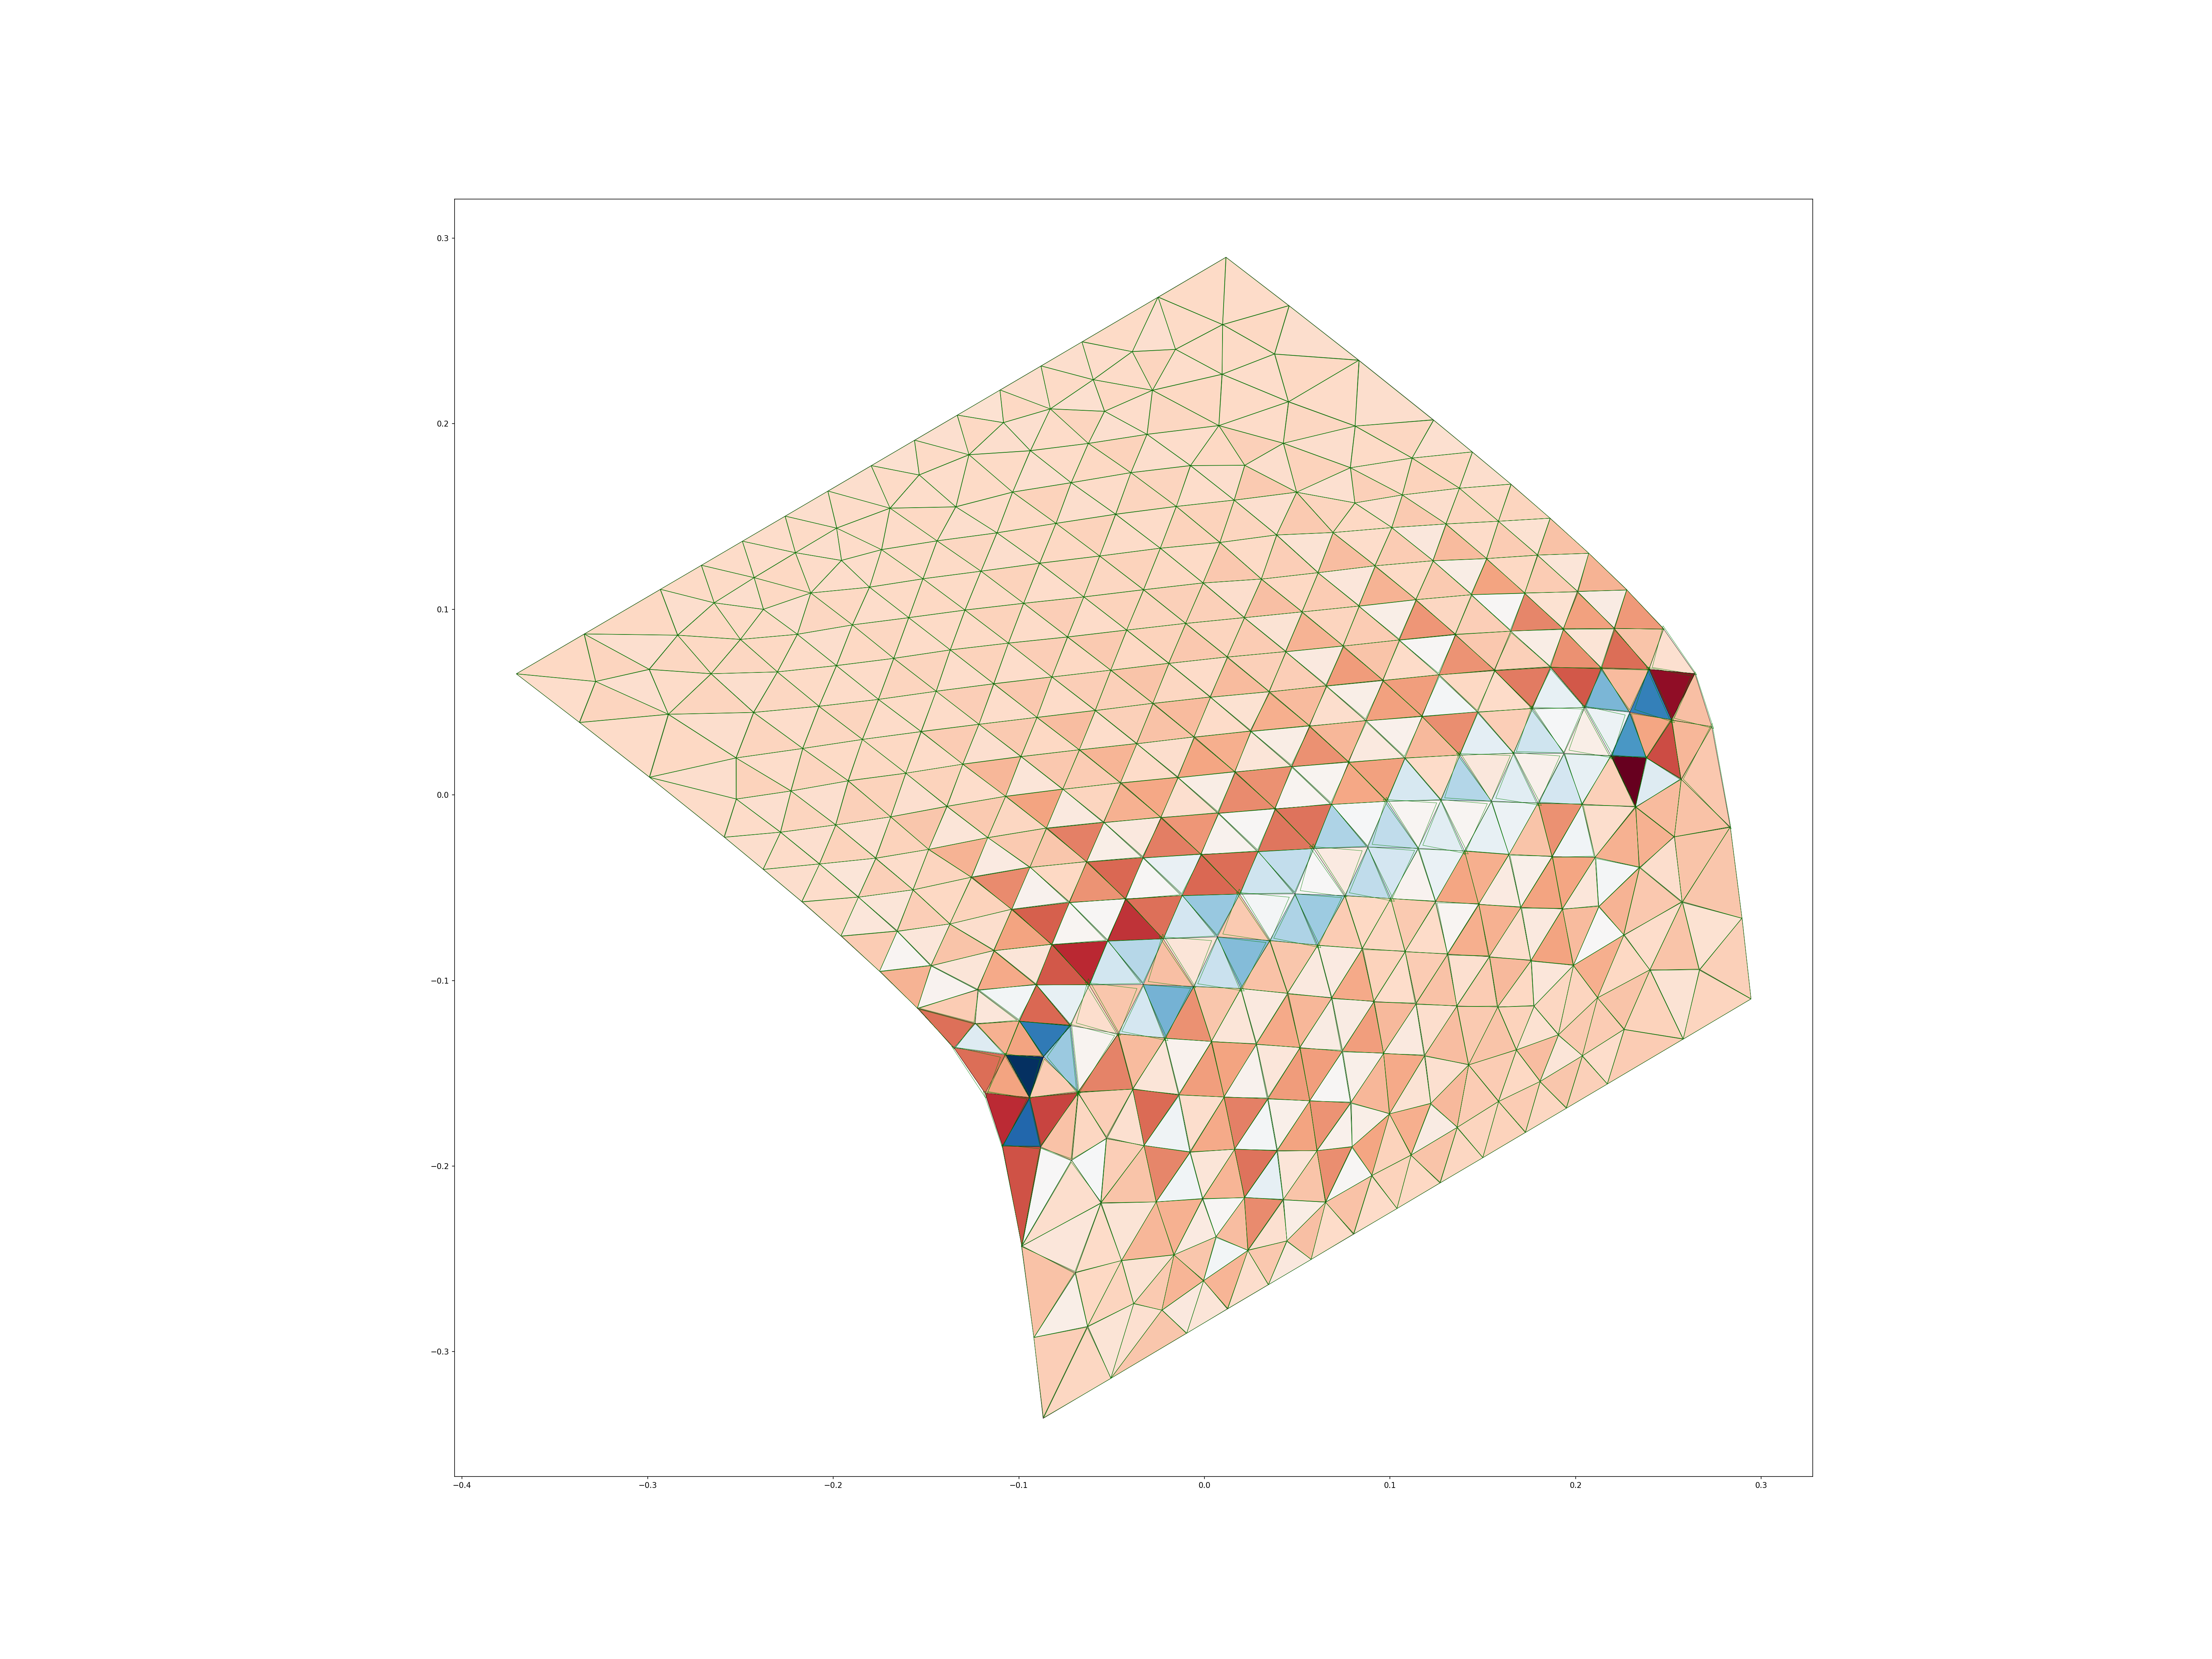

In [79]:
%matplotlib notebook 

from matplotlib import pyplot as plt

fig = plt.figure(figsize=(40,30))

surfacemesh = surfacemeshes[7]
pts = surfacemesh["pts"]
fpts = surfacemesh["fpts"]
tris = surfacemesh["tris"]

sfac = 0.99

areachange = surfacemesh["triareas"]/surfacemesh["ftriareas"]
X = fpts[:,0]
Y = fpts[:,1]
plt.tripcolor(X, Y, tris, facecolors=areachange, cmap='RdBu')

lineindexes = set(sum([[(min(i0,i1), max(i0,i1))  for i0,i1 in ((i0,i1), (i1,i2), (i2,i0))]  for i0,i1,i2 in tris], start=[]))
plt.gca().add_collection(LineCollection(((fpts[i0], fpts[i1])  for i0, i1 in lineindexes), color="black", linewidth=0.4))
plt.gca().add_collection(LineCollection((insettri(fpts, pts, tri, sfac)  for tri in tris), color="green", linewidth=0.4))

plt.gca().set_aspect("equal")
plt.gca().autoscale()
plt.savefig("distortedtriangles.png")

In [ ]:
plt.gca().add_collection(LineCollection(parapolygraph.legsdata(), color=cmap(norm(parapolygraph.legsstretchratio()))))


In [80]:
surfacemesh.keys()

dict_keys(['polynodes', 'polyloop', 'uvpts', 'pts', 'tris', 'linecontour', 'fpts', 'triareas', 'ftriareas', 'cornerangs', 'fcornerangs'])

In [83]:
import pygmsh
mesh_size = 0.05
with pygmsh.geo.Geometry() as g:
    g.add_polygon(surfacemesh["polyloop"], mesh_size=mesh_size)
    mesh = g.generate_mesh()


/nix/store/sr711v3q725xxiybwnlfx6167s1zhqy4-python3.9-numpy-1.21.2/lib/python3.9/site-packages/numpy/ctypeslib.py:518: RuntimeWarning: A builtin ctypes object gave a PEP3118 format string that does not match its itemsize, so a best-guess will be made of the data type. Newer versions of python may behave correctly.
  return asarray(obj)


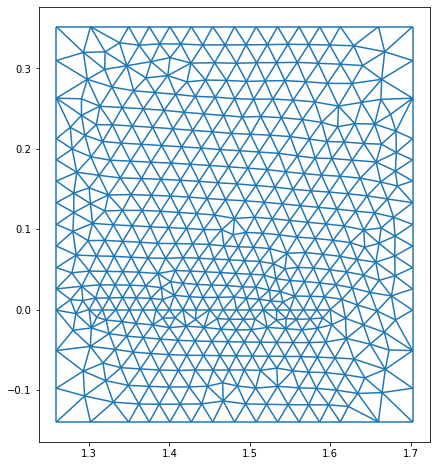

In [164]:
%matplotlib inline 
import math

fig = plt.figure(figsize=(9,8))
import pygmsh
mesh_size = 0.05
s = plt.subplot(1,1,1)

rotpolyloop = surfacemesh["polyloop"]

sss = [ (1.3, 0), (1.5, 0)]

with pygmsh.geo.Geometry() as g:
    poly = g.add_polygon(rotpolyloop, mesh_size=mesh_size)
    #2 = g.add_polygon(sss, mesh_size=mesh_size)
    for x in numpy.linspace(1.3, 1.6, 19):
        q = g.add_point((x,0))
        g.in_surface(q, poly.surface)
    #g.in_surface(poly.lines[14], poly.surface)
    mesh = g.generate_mesh()

tris = mesh.cells_dict["triangle"]
lineindexes = set(sum([[(min(i0,i1), max(i0,i1))  for i0,i1 in ((i0,i1), (i1,i2), (i2,i0))]  for i0,i1,i2 in tris], start=[]))
lc = LineCollection([ (mesh.points[l[0]][:2], mesh.points[l[1]][:2])  for l in lineindexes ])
s.add_collection(lc)
s.set_aspect("equal")
s.autoscale()


In [161]:
q

<pygmsh Point object, ID 39, x = [1.5, 0, 0.0]>

In [154]:
help(poly.points[0])

Help on Point in module pygmsh.common.point object:

class Point(builtins.object)
 |  Point(env, x: 'tuple[float, float] | tuple[float, float, float]', mesh_size: 'float | None' = None)
 |  
 |  Creates an elementary point.
 |  
 |  x : Give the coordinates X, Y (and Z) of the point in the three-dimensional
 |      Euclidean space.
 |  mesh_size : The prescribed mesh element size at this point.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, env, x: 'tuple[float, float] | tuple[float, float, float]', mesh_size: 'float | None' = None)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __repr__(self)
 |      Return repr(self).
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)
 |  
 |  ------------------------------------------------------

In [149]:
g.in_surface((1.5, 0), poly.surface)

'wingflat.mtl'

In [48]:
# output with textures
import os

fobjname = "wingflat.obj"
fmtlname = os.path.splitext(fobjname)[0]+".mtl"

fout = open(fobjname, 'w')
foutmtl = open(fmtlname, 'w')
fout.write("# OBJ file\n")
joff = 1
matbitmap = "diax.jpg"
matbitmapscale = 10
for i, surfacemesh in enumerate(surfacemeshes):
    fout.write("o patch%d\n" % (10+i))
    pts = surfacemesh["pts"]
    fpts = surfacemesh["fpts"]
    for v in pts:
        fout.write("v %.4f %.4f %.4f\n" % tuple(v))
    for fv in fpts:
        fout.write("vt %.4f %.4f\n" % tuple(fv*matbitmapscale))
    materialname = "mat%d\n" % (10+i)
    fout.write("usemtl %s\n"%materialname)
    fout.write("s off\n")
    for t in surfacemesh["tris"]:
        fout.write("f %d/%d %d/%d %d/%d\n" % (t[0]+joff,t[0]+joff, t[1]+joff,t[1]+joff, t[2]+joff,t[2]+joff,))
    fout.write("\n")
    joff += len(pts)

    lrr = i/11.0
    foutmtl.write("newmtl %s\n"%materialname)
    foutmtl.write("  Ka %f %f %f\n"%(1-lrr, 0.5, lrr))
    #foutmtl.write("  Kd %f %f %f"%[mat.albedo_color.r, mat.albedo_color.g, mat.albedo_color.b])
    #foutmtl.write("  Ks %f %f %f"%[mat.metallic, mat.metallic, mat.metallic])
    foutmtl.write("  Ns %f\n"%101)
    foutmtl.write("  map_Kd %s\n"%matbitmap)
    foutmtl.write("  illum 2\n")
    foutmtl.write("\n")
    
fout.close()
foutmtl.close()

    

In [5]:
# output separate triangles with colours
import os

fobjname = "wingflat.obj"
fmtlname = os.path.splitext(fobjname)[0]+".mtl"

fout = open(fobjname, 'w')
foutmtl = open(fmtlname, 'w')
fout.write("# OBJ file\n")
joff = 1
areachangerad = 0.0001
for i, surfacemesh in enumerate(surfacemeshes):
    fout.write("o patch%d\n" % (10+i))
    pts = surfacemesh["pts"]
    fpts = surfacemesh["fpts"]
    tris = surfacemesh["tris"]
    areachange = surfacemesh["triareas"]/surfacemesh["ftriareas"]
    assert len(areachange) == len(tris)
    for t in tris:
        fout.write("v %.4f %.4f %.4f\n" % tuple(pts[t[0]]))
        fout.write("v %.4f %.4f %.4f\n" % tuple(pts[t[1]]))
        fout.write("v %.4f %.4f %.4f\n" % tuple(pts[t[2]]))
    for a in areachange:
        v = max(0.01, min(0.99, (a-(1-areachangerad))/(2*areachangerad)))
        fout.write("vt %.4f %.4f\n" % (0.5, v))
        fout.write("vt %.4f %.4f\n" % (0.5, v))
        fout.write("vt %.4f %.4f\n" % (0.5, v))
    materialname = "mat%d\n" % (10+i)
    fout.write("usemtl %s\n"%materialname)
    fout.write("s off\n")
    for i in range(len(tris)):
        i3 = i*3
        fout.write("f %d/%d %d/%d %d/%d\n" % (i3+joff,i3+joff, i3+1+joff,i3+1+joff, i3+2+joff,i3+2+joff,))
    fout.write("\n")
    joff += len(tris)*3

    lrr = i/11.0
    foutmtl.write("newmtl %s\n"%materialname)
    foutmtl.write("  Ka %f %f %f\n"%(1-lrr, 0.5, lrr))
    #foutmtl.write("  Kd %f %f %f"%[mat.albedo_color.r, mat.albedo_color.g, mat.albedo_color.b])
    #foutmtl.write("  Ks %f %f %f"%[mat.metallic, mat.metallic, mat.metallic])
    foutmtl.write("  Ns %f\n"%101)
    matbitmap = "shadecolour.png"
    foutmtl.write("  map_Kd %s\n"%matbitmap)
    foutmtl.write("  illum 2\n")
    foutmtl.write("\n")

fout.close()
foutmtl.close()




In [26]:
surfacemesh = surfacemeshes[0]
areachange = surfacemesh["triareas"]/surfacemesh["ftriareas"]
areachange

array([0.99999569, 1.00003533, 0.99995384, ..., 1.00009683, 1.00007334,
       0.99970598])

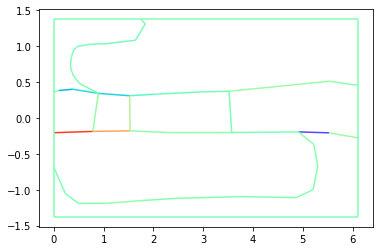

In [60]:
%matplotlib inline

from matplotlib import colors
cmap = plt.cm.rainbow
norm = colors.Normalize(vmin=0.98, vmax=1.02)
plt.gca().add_collection(LineCollection(legsdata(), color=cmap(norm(legsratio()))))
plt.gca().autoscale()


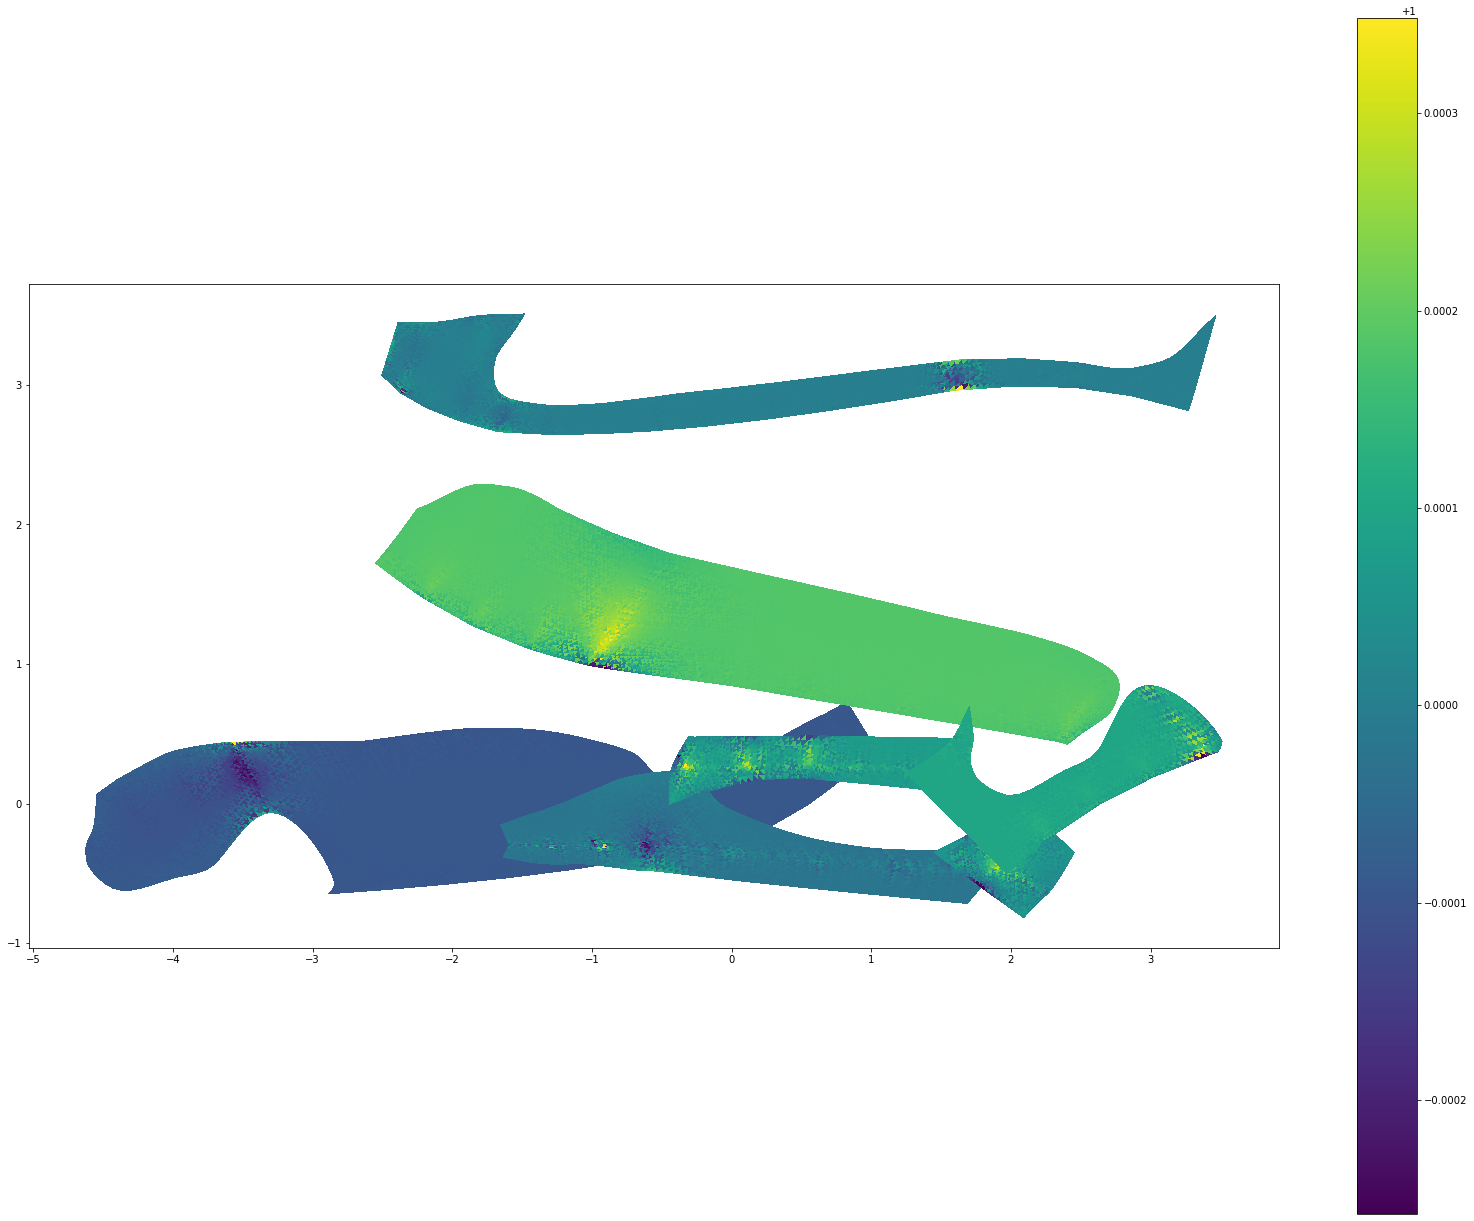

In [18]:
%matplotlib inline 

from matplotlib import pyplot as plt

fig = plt.figure(figsize=(28,22))

surfacemeshes

coffsets = [(5, -2, 0, "green"), (1, 0, 1.3, "blue"), 
            (0, 0, -0.3, "red"), (2, 0.6, +0.3, "purple"),
            (3, 2, -0.4, "blue"), (4, 2.4, 0.2, "red"), 
            (6, 0, 3, "red") #, (7, -0.2, 2.1, "purple"), 
            #(8, -0.2, 1.1, "purple")
           ]
for i, tx, ty, col in coffsets:
    surfacemesh = surfacemeshes[i]
    pts = surfacemesh["pts"]
    fpts = surfacemesh["fpts"]
    tris = surfacemesh["tris"]
    X = fpts[:,0]+tx
    Y = fpts[:,1]+ty
    
    #plt.triplot(X, Y, tris, color=col)
    areachange = surfacemesh["triareas"]/surfacemesh["ftriareas"]
    plt.tripcolor(X, Y, tris, facecolors=areachange)
    
plt.gca().set_aspect("equal")
plt.colorbar()
#plt.savefig("test.png")

/nix/store/sr711v3q725xxiybwnlfx6167s1zhqy4-python3.9-numpy-1.21.2/lib/python3.9/site-packages/numpy/ctypeslib.py:518: RuntimeWarning: A builtin ctypes object gave a PEP3118 format string that does not match its itemsize, so a best-guess will be made of the data type. Newer versions of python may behave correctly.
  return asarray(obj)


>>> >>> >>> >>> >>> >>> >>> >>> >>> ... ... ... ... ... ... ... ... >>> >>> 
>>> 

[FreeCAD Console mode <Use Ctrl-D (i.e. EOF) to exit.>]
mesh (pts=3006, tris=5833) flattened
[FreeCAD Console mode <Use Ctrl-D (i.e. EOF) to exit.>]



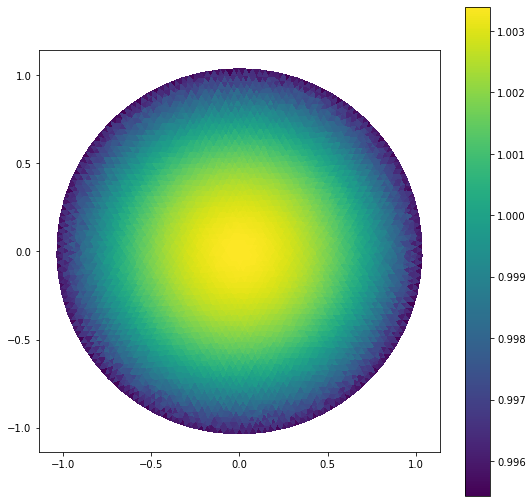

In [21]:
###########
# make a surfacemesh that's part of a sphere example
###########

%matplotlib inline 

from matplotlib import pyplot as plt
from parapolygraph import trimeshesflattener
freecadappimage = "freecad"   # nixos install

import math, numpy, pygmsh

raddisc = 1.0
mesh_size = 0.05
radsphere = 2

fig = plt.figure(figsize=(9,9))

polyloop = [ P2(math.cos(math.radians(d)), math.sin(math.radians(d)))*raddisc  for d in numpy.linspace(0, 360, 60)[:-1] ]
with pygmsh.geo.Geometry() as g:
    g.add_polygon(polyloop, mesh_size=mesh_size)
    mesh = g.generate_mesh()
    
def projsphere(p):
    return P3(p.u, p.v, math.sqrt(radsphere**2 - p.Lensq()))
pts = [ projsphere(P2(p[0], p[1]))  for p in mesh.points ]

spheresurfacemesh = { "polyloop":polyloop,
                      "uvpts":mesh.points, 
                      "pts":numpy.array(pts),
                      "tris":mesh.cells_dict["triangle"]
                    }

trimeshesflattener([spheresurfacemesh], freecadappimage)
areachange = spheresurfacemesh["triareas"]/spheresurfacemesh["ftriareas"]
#areachange = (spheresurfacemesh["cornerangs"]/spheresurfacemesh["fcornerangs"] - 1)

fpts = spheresurfacemesh["fpts"]
#fpts = spheresurfacemesh["uvpts"]
X = fpts[:,0]
Y = fpts[:,1]
tris = spheresurfacemesh["tris"]

plt.tripcolor(X, Y, tris, facecolors=areachange)
#plt.triplot(X, Y, tris, color="blue")

plt.gca().set_aspect("equal")
plt.colorbar()



<IPython.core.display.Javascript object>


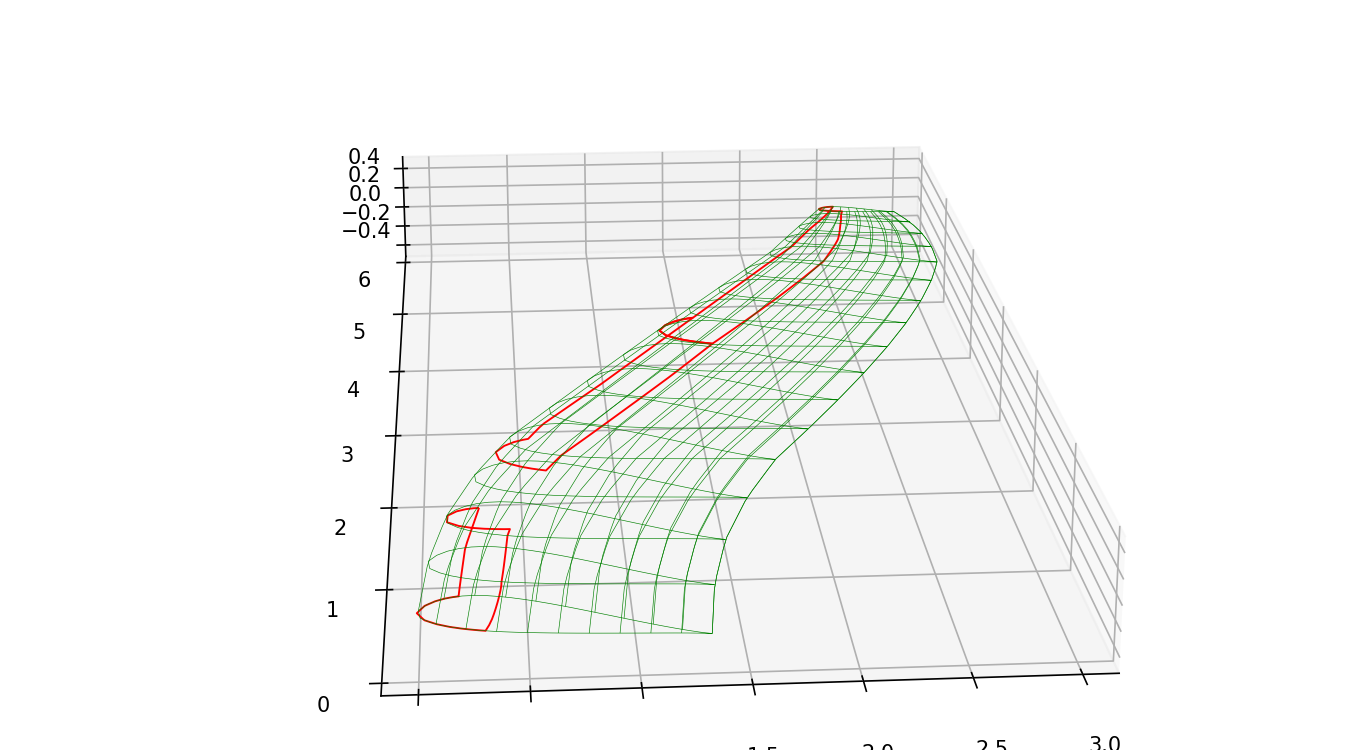

(0.0, 6.0)

In [4]:
%matplotlib notebook

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d.art3d import Line3DCollection
import numpy

def flipyz(p):
    return P3(p.x, p.z, p.y)

fig = plt.figure(figsize=(9,5))
ax3d = fig.add_subplot(1,1,1, projection='3d')
ax3d.set_box_aspect([1,2,0.2], zoom=2.3)

ax3d.add_collection(Line3DCollection(wingshape.linesegmentnetflipyz(flipyz), color="green", linewidth=0.3))
segpolys = [ ]
for k in [0, 4, 2]:
    polyloop = surfacemeshes[k]["polyloop"]
    segpolys.append([flipyz(wingshape.seval(p))  for p in polyloop])
    segpolys[-1].append(segpolys[-1][0])
lp3d = Line3DCollection(segpolys, color="red", linewidth=0.9)
ax3d.add_collection(lp3d)

ax3d.set_aspect('auto')
ax3d.set_clip_on(False)
ax3d.autoscale_view()
ax3d.set_xlim3d(-0.1, 3.1)
ax3d.set_zlim3d(-0.5, 0.5)
ax3d.set_ylim3d(0, 6)

<IPython.core.display.Javascript object>


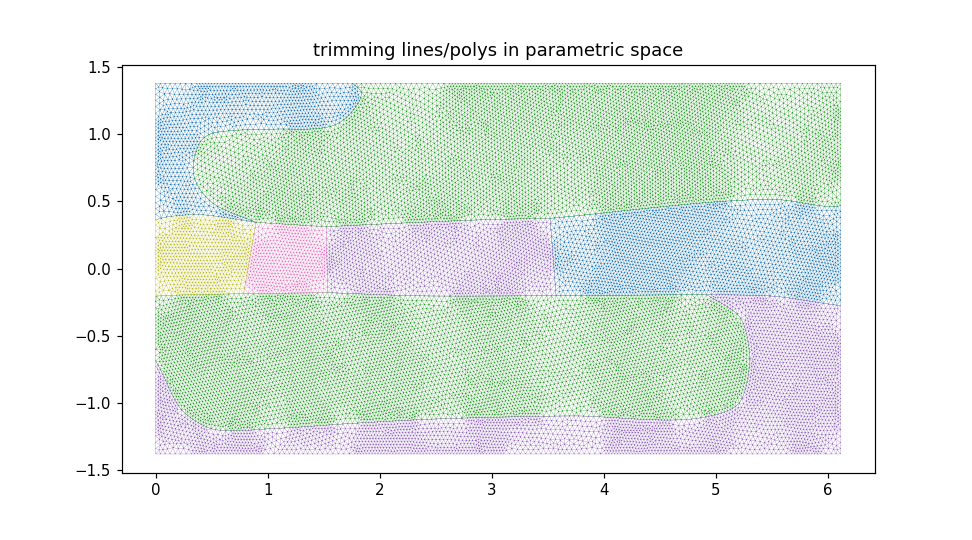

In [9]:
%matplotlib notebook

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d.art3d import Line3DCollection

import pygmsh, numpy

fig = plt.figure(figsize=(9,5))
for surfacemesh in surfacemeshes:
    uvpts = surfacemesh["uvpts"]
    plt.triplot(uvpts[:,0], uvpts[:,1], surfacemesh["tris"], linewidth=0.2)
plt.title("trimming lines/polys in parametric space");


<IPython.core.display.Javascript object>


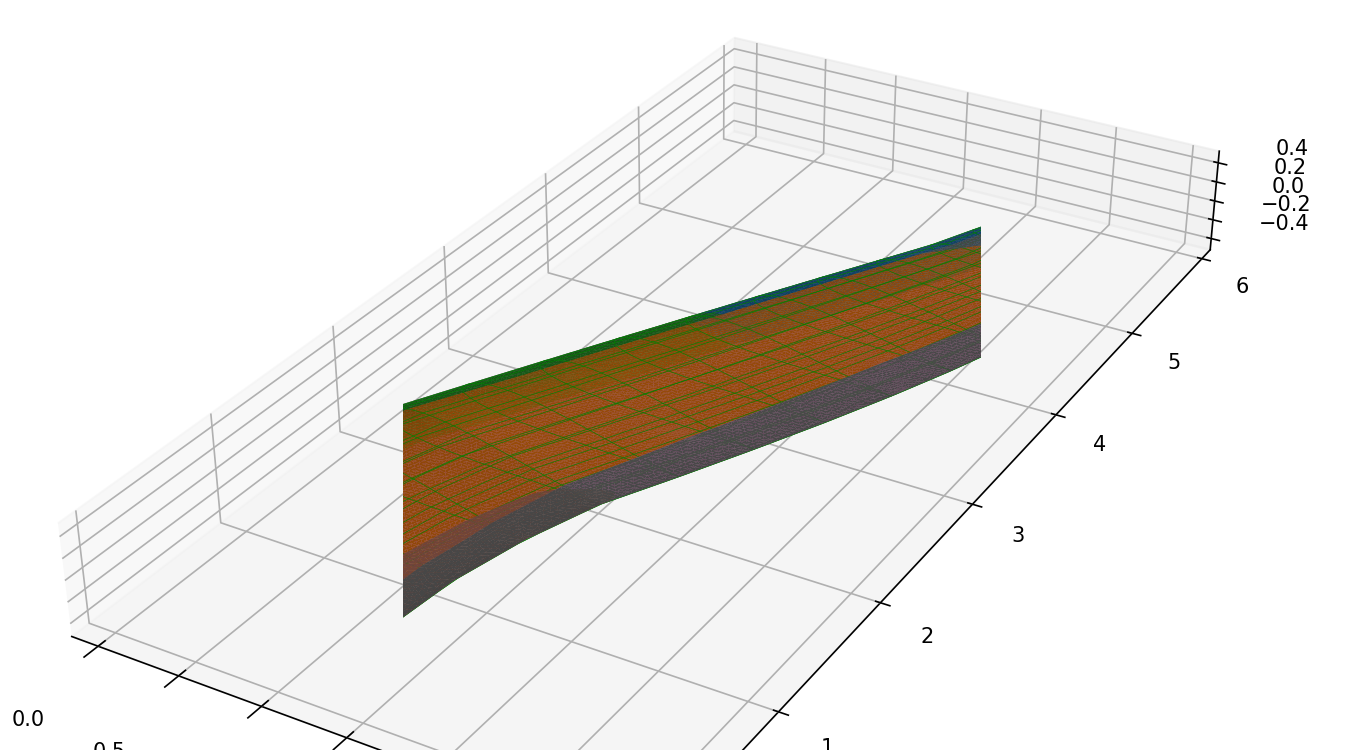

(0.0, 6.0)

In [7]:
%matplotlib notebook

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d.art3d import Line3DCollection

import numpy
fig = plt.figure(figsize=(9,5))

ax3d = fig.add_subplot(1,1,1, projection='3d')
ax3d.set_box_aspect([1,2,0.2], zoom=2.3)
ax3d.add_collection(Line3DCollection(wingshape.linesegmentnetflipyz(flipyz), color="green", linewidth=0.3))

for surfacemesh in surfacemeshes:
    pts = surfacemesh["pts"]
    ax3d.plot_trisurf(pts[:,0], pts[:,2], Z=pts[:,1], triangles=surfacemesh["tris"])

ax3d.set_aspect('auto')
ax3d.set_clip_on(False)
ax3d.autoscale_view()
ax3d.set_xlim3d(-0.1, 3.1)
ax3d.set_zlim3d(-0.5, 0.5)
ax3d.set_ylim3d(0, 6)

1013

In [4]:
freecadappimage = "/home/timbo/software/FreeCAD_0.19-24054-Linux-Conda_glibc2.12-x86_64.AppImage"
# fetch from: wget https://github.com/FreeCAD/FreeCAD/releases/download/0.19_pre/FreeCAD_0.19-24267-Linux-Conda_glibc2.12-x86_64.AppImage
freecadappimage = "freecad"   # nixos install

from parapolygraph import trimeshesflattener
trimeshesflattener(surfacemeshes, freecadappimage)


>>> >>> >>> >>> >>> >>> >>> >>> >>> ... ... ... ... ... ... ... ... >>> >>> 
>>> 

[FreeCAD Console mode <Use Ctrl-D (i.e. EOF) to exit.>]
mesh (pts=2367, tris=4530) flattened
mesh (pts=7343, tris=14308) flattened
mesh (pts=1705, tris=3246) flattened
mesh (pts=505, tris=930) flattened
mesh (pts=696, tris=1303) flattened
mesh (pts=1187, tris=2183) flattened
mesh (pts=6672, tris=12937) flattened
mesh (pts=3456, tris=6419) flattened
[FreeCAD Console mode <Use Ctrl-D (i.e. EOF) to exit.>]



<IPython.core.display.Javascript object>


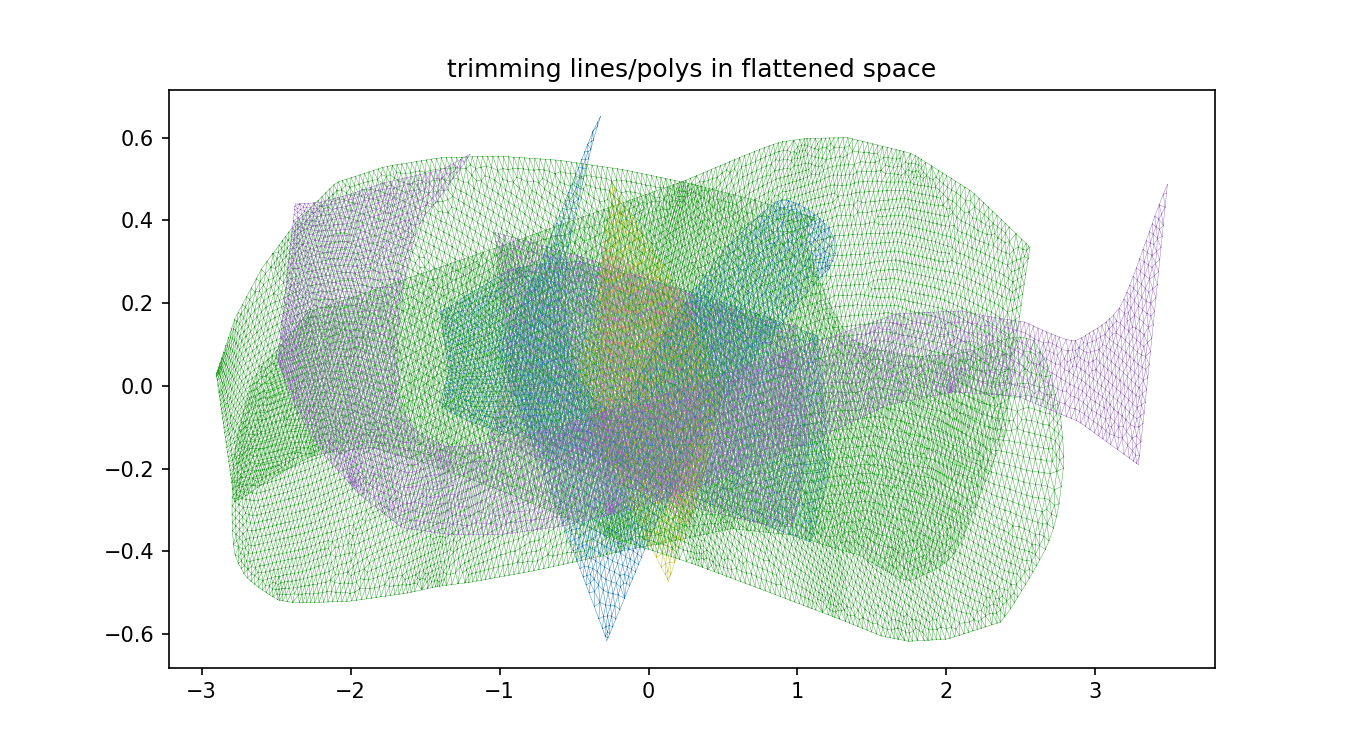

In [5]:
fig = plt.figure(figsize=(9,5))
for surfacemesh in surfacemeshes:
    uvpts = surfacemesh["uvpts"]
    fpts = surfacemesh["fpts"]
    #plt.triplot(uvpts[:,0], uvpts[:,1], surfacemesh["tris"], linewidth=0.2)
    plt.triplot(fpts[:,0], fpts[:,1], surfacemesh["tris"], linewidth=0.2)
    plt.title("trimming lines/polys in flattened space");


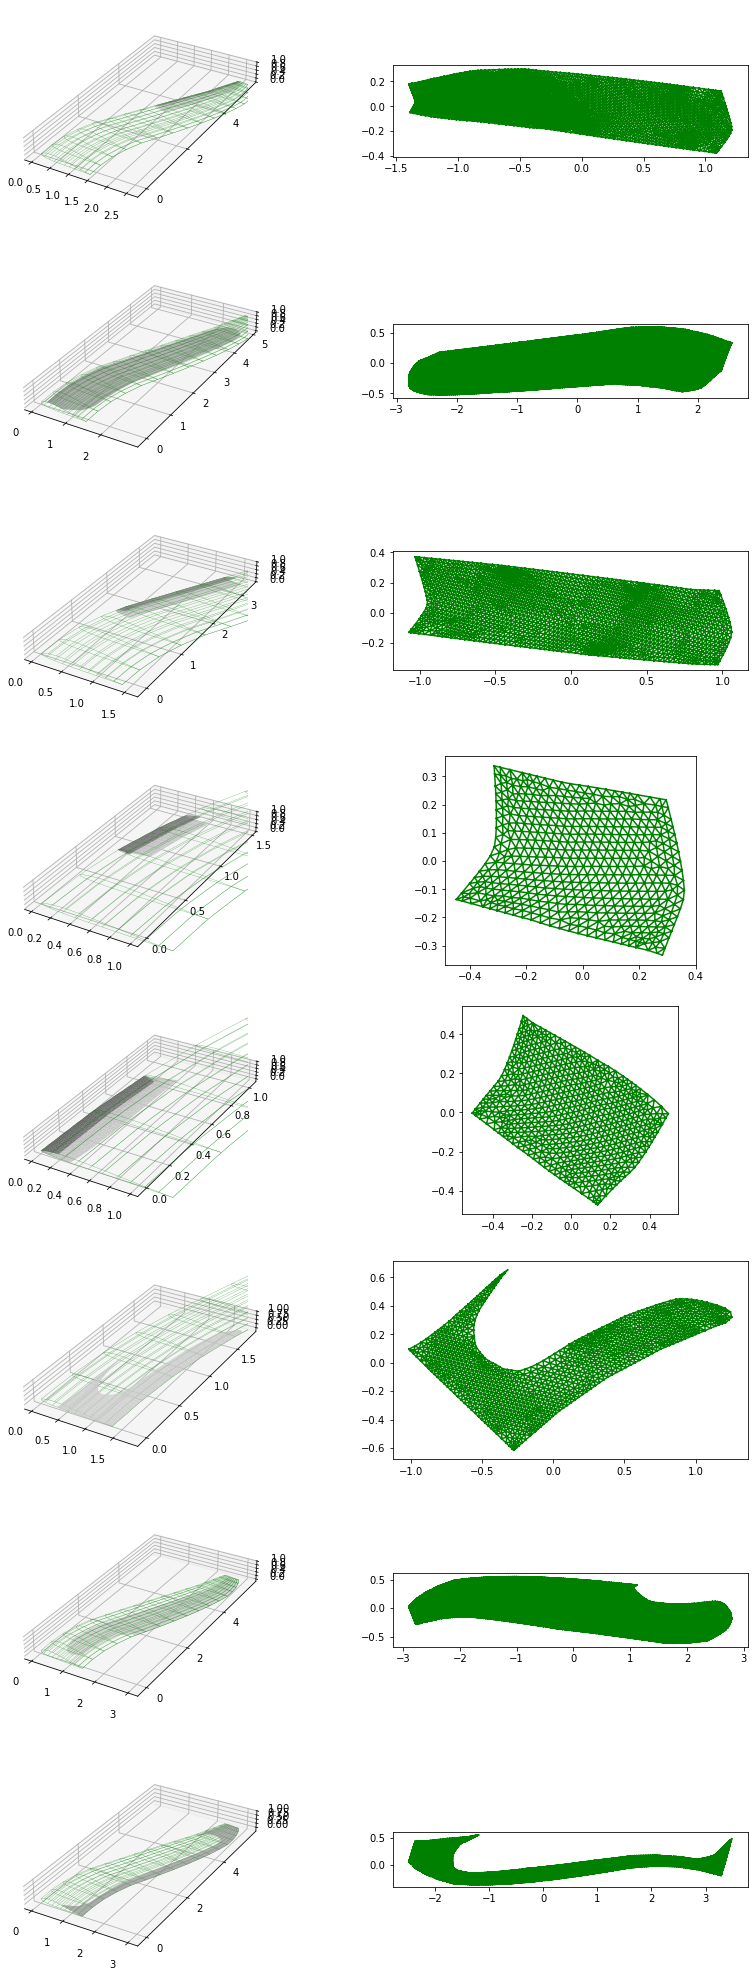

In [9]:
%matplotlib inline 

def fullflattriareas(surfacemesh):
    ptsP = [ P3(*p)  for p in surfacemesh["pts"] ]
    fptsP = [ P2(*p)  for p in surfacemesh["fpts"] ]
    tris = surfacemesh["tris"]

    def P2Cross(a, b):
        return a.u*b.v - b.u*a.v

    triareas = [ ]
    for tri in tris:
        p0, p1, p2 = ptsP[tri[0]], ptsP[tri[1]], ptsP[tri[2]]
        parea = 0.5*P3.Cross(p1 - p0, p2 - p0).Len()
        f0, f1, f2 = fptsP[tri[0]], fptsP[tri[1]], fptsP[tri[2]]
        farea = 0.5*abs(P2Cross(f1 - f0, f2 - f0))
        #areachange = farea/parea
        triareas.append([parea, farea])
    return numpy.array(triareas)

def flipyz(p):
    return P3(p.x, p.z, p.y)

fig = plt.figure(figsize=(14,36))

nrows = len(surfacemeshes)
for i in range(nrows):
    surfacemesh = surfacemeshes[i]
    pts = surfacemesh["pts"]
    fpts = surfacemesh["fpts"]
    tris = surfacemesh["tris"]
    ax = fig.add_subplot(nrows, 2, i*2+1, projection='3d')
    ax.set_box_aspect([1,2,0.2], zoom=1.3)
    ax.add_collection(Line3DCollection(wingshape.linesegmentnetflipyz(flipyz), color="green", linewidth=0.2))
    ax.plot_trisurf(pts[:,0], pts[:,2], Z=pts[:,1], triangles=tris, color="white")

    fax = fig.add_subplot(nrows, 2, i*2+2)
    X = fpts[:,0]
    Y = fpts[:,1]

    fax.triplot(X, Y, tris, color="green")
    fax.set_aspect("equal")
    triareas = fullflattriareas(surfacemesh)
    

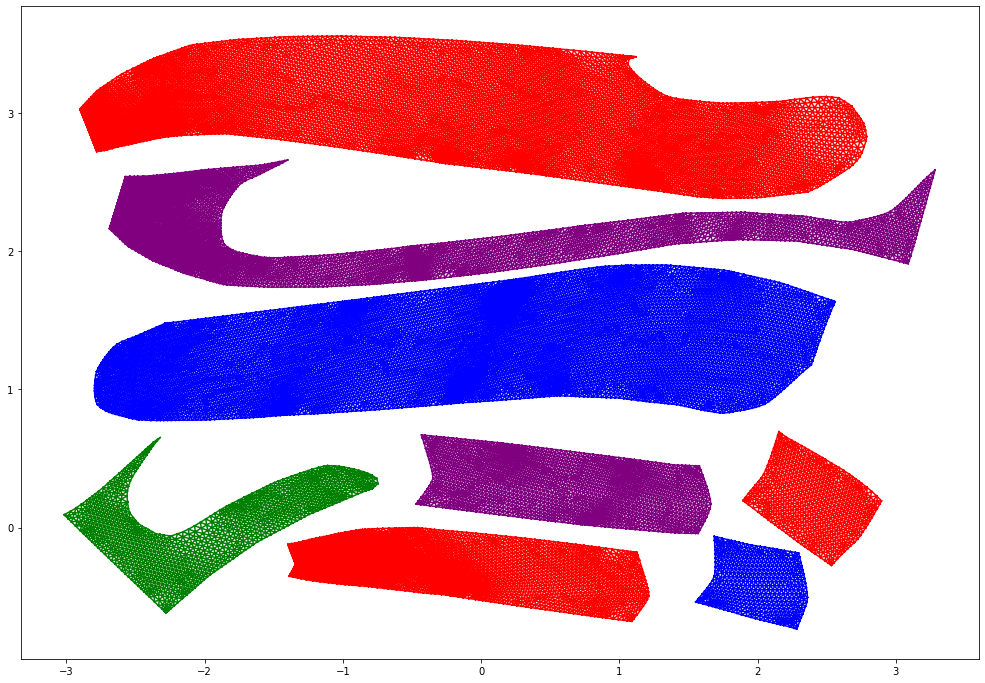

In [11]:
%matplotlib inline 

fig = plt.figure(figsize=(18,12))
coffsets = [(5, -2, 0, "green"), (1, 0, 1.3, "blue"), 
            (0, 0, -0.3, "red"), (2, 0.6, +0.3, "purple"),
            (3, 2, -0.4, "blue"), (4, 2.4, 0.2, "red"), 
            (6, 0, 3, "red"), (7, -0.2, 2.1, "purple")]
fax = fig.add_subplot()
for i, tx, ty, col in coffsets:
    surfacemesh = surfacemeshes[i]
    pts = surfacemesh["pts"]
    fpts = surfacemesh["fpts"]
    tris = surfacemesh["tris"]
    X = fpts[:,0]+tx
    Y = fpts[:,1]+ty
    fax.triplot(X, Y, tris, color=col)
    fax.set_aspect("equal")